In [1]:
#Load Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#Load Data
data = pd.read_csv('./cancer.csv')
#Display data
data

,id,Clump Thickness,UofCSize,UofCShape,Marginal Adhesion,SECSize,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
678,776715,3,1,1,1,3,2,1,1,1,2
679,841769,2,1,1,1,2,1,1,1,1,2
680,888820,5,10,10,3,7,3,8,10,2,4
681,897471,4,8,6,4,3,4,10,6,1,4


In [3]:
#Dropping id column
cancer=data.drop('id',axis=1)
#Display data
cancer.head()

,Clump Thickness,UofCSize,UofCShape,Marginal Adhesion,SECSize,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [4]:
#Show Key Statistics
cancer.describe()

,Clump Thickness,UofCSize,UofCShape,Marginal Adhesion,SECSize,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [5]:
# find the count of Class attribute(2 for benign, 4 for malignant)
cancer['Class'].value_counts()

2    444
4    239
Name: Class, dtype: int64

<AxesSubplot:xlabel='Class', ylabel='count'>

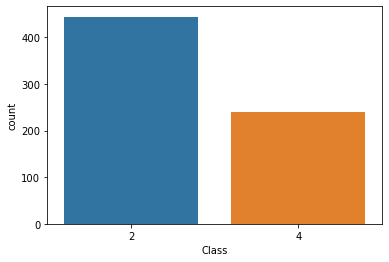

In [6]:
sns.countplot(x='Class',data = cancer)

<AxesSubplot:>

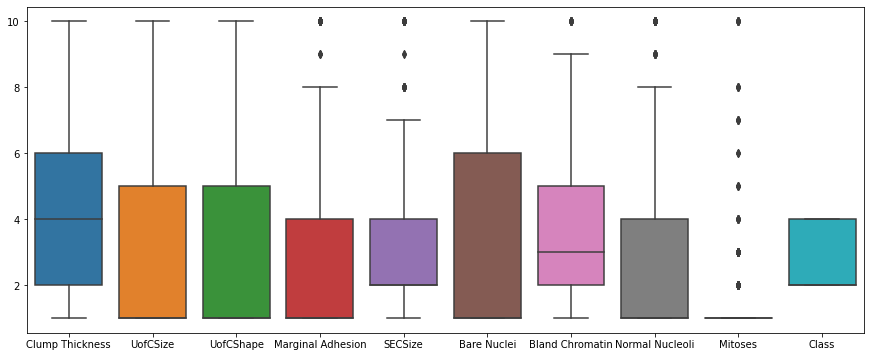

In [7]:
#Boxplot Visualization
plt.figure(figsize=(15,6))
sns.boxplot(data=cancer)

<AxesSubplot:>

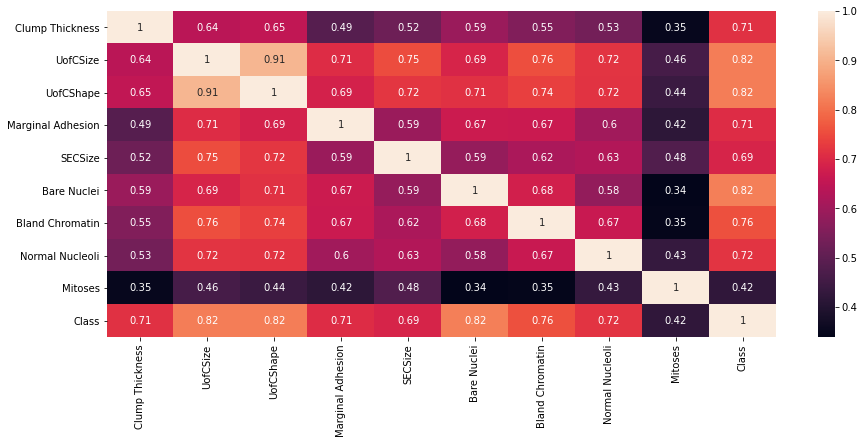

In [8]:
plt.figure(figsize=(15,6))
sns.heatmap(cancer.corr(), annot=True)

In [9]:
#Create x and y variables
x=cancer.drop('Class', axis=1).to_numpy()
y=cancer['Class'].to_numpy()

#Create Training and Test Datasets
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test = train_test_split(x, y, stratify=y,test_size=0.2,random_state=100)

#Scale the Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train2 = sc.fit_transform(x_train)
x_test2 = sc.transform(x_test)

In [10]:
#Script for SVM and NB
#from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix  

#for name,method in [('SVM', SVC(kernel='linear',random_state=100)),
                   # ('Naive Bayes',GaussianNB())]: 
for name,method in [('Naive Bayes',GaussianNB())]:       
    method.fit(x_train2,y_train)
    predict = method.predict(x_test2)
    target_names=['benign','malignant']
    print('\nEstimator: {}'.format(name)) 
    print(confusion_matrix(y_test,predict))  
    print(classification_report(y_test,predict,target_names=target_names))     


Estimator: Naive Bayes
[[86  3]
 [ 1 47]]
              precision    recall  f1-score   support

      benign       0.99      0.97      0.98        89
   malignant       0.94      0.98      0.96        48

    accuracy                           0.97       137
   macro avg       0.96      0.97      0.97       137
weighted avg       0.97      0.97      0.97       137

